In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('listings_all_cleaned.pickle', 'rb') as file:
    data1 = pickle.load(file)
with open('listings_all_day2_cleaned.pickle', 'rb') as file:
    data2 = pickle.load(file)
with open('listings_all_day3_cleaned.pickle', 'rb') as file:
    data3 = pickle.load(file)
with open('listings_all_day4_cleaned.pickle', 'rb') as file:
    data4 = pickle.load(file)
with open('new_listings_all_2nd_cleaned.pickle', 'rb') as file:
    new_data = pickle.load(file)

In [16]:
data1.isnull().sum()[['latitude', 'longitude', 'cost']]

latitude     17
longitude    17
cost          2
dtype: int64

In [17]:
data2.isnull().sum()[['latitude', 'longitude', 'cost']]

latitude     423
longitude    423
cost           2
dtype: int64

In [18]:
data3.isnull().sum()[['latitude', 'longitude', 'cost']]

latitude     667
longitude    667
cost           2
dtype: int64

In [19]:
data4.isnull().sum()[['latitude', 'longitude', 'cost']]

latitude     774
longitude    774
cost           2
dtype: int64

In [44]:
data1.groupby(['latitude', 'longitude']).size().shape

(1869,)

In [25]:
data2.groupby(['latitude', 'longitude']).size().shape

(1677,)

In [26]:
data3.groupby(['latitude', 'longitude']).size().shape

(1529,)

In [27]:
data4.groupby(['latitude', 'longitude']).size().shape

(1450,)

In [29]:
data1.columns

Index(['latitude', 'longitude', 'place', 'cost', 'datetime_posted',
       'datetime_update', 'last_time_pos', 'availability', 'bathroom',
       'bedroom', 'other_info', 'size_house', 'townhouse', 'w/d-in-unit',
       'no-smoking', 'attached-garage', 'apartment', 'laundry-in-bldg',
       'street-parking', 'cats-are-OK---purrr', 'dogs-are-OK---wooof',
       'laundry-on-site', 'off-street-parking', 'carport',
       'wheelchair-accessible', 'condo', 'manufactured', 'no-laundry-on-site',
       'furnished', 'detached-garage', 'house', 'w/d-hookups', 'duplex',
       'open-house-dates', 'cottage/cabin', 'flat', 'in-law', 'valet-parking',
       'no-parking', 'loft', 'land', 'id', 'link', 'title'],
      dtype='object')

In [3]:
null_ids_day2 =  set(data2.loc[data2['latitude'].isnull(),'id']) - set(data1.loc[data1['latitude'].isnull(),'id'])
null_ids_day3 = set(data3.loc[data3['latitude'].isnull(),'id']) - set(data2.loc[data2['latitude'].isnull(),'id'])
null_ids_day4 = set(data4.loc[data4['latitude'].isnull(),'id']) - set(data3.loc[data3['latitude'].isnull(),'id'])

In [83]:
for i in data4.loc[data4['id'].isin(null_ids_day4),'link']:
    print(i)

https://sfbay.craigslist.org/nby/apa/d/panoramic-water-views-condo/6732002884.html
https://sfbay.craigslist.org/eby/apa/d/huge-apartment-with-garden/6731999824.html
https://sfbay.craigslist.org/eby/apa/d/large-one-bedroom-with-garden/6731988477.html
https://sfbay.craigslist.org/eby/apa/d/live-in-luxury-in-huge/6731976994.html
https://sfbay.craigslist.org/eby/apa/d/coming-soon-gated-entry-join/6731969914.html
https://sfbay.craigslist.org/eby/apa/d/2-weeks-free-awesome-location/6731967128.html
https://sfbay.craigslist.org/sfc/apa/d/bay-views-d-fireplace-patio/6731968614.html
https://sfbay.craigslist.org/sby/apa/d/sunny-corner-2x2-in-the-heart/6731967386.html
https://sfbay.craigslist.org/sfc/apa/d/bay-views-d-fireplace-patio/6731966203.html
https://sfbay.craigslist.org/eby/apa/d/hot-deal-awesome-location/6722467363.html
https://sfbay.craigslist.org/eby/apa/d/top-floor-2-bedroom-double/6731964456.html
https://sfbay.craigslist.org/sby/apa/d/500-look-lease-1-month-free/6731962843.html
https:

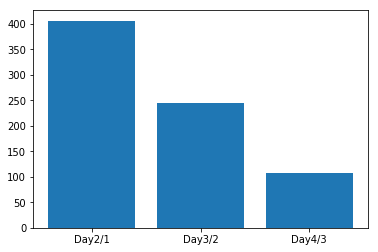

In [71]:
fig, ax = plt.subplots()
ind = np.arange(1, 4)
a,b,c = plt.bar(ind, [len(null_ids_day2), len(null_ids_day3), len(null_ids_day4)])
ax.set_xticks(ind)
ax.set_xticklabels(['Day2/1', 'Day3/2', 'Day4/3'])

In [4]:
all_null_ids = null_ids_day4.union(null_ids_day3, null_ids_day2)

In [5]:
removed_prop = data1.loc[data1['id'].isin(all_null_ids),:]

In [6]:
removed_prop.shape

(758, 44)

In [7]:
def common_data(d1, d2, features = ['latitude', 'longitude', 'other_info', 'size_house', 'bathroom', 'bedroom']):
    #d1.loc[:,features] = d1[features].dropna().copy()
    bool_list = []
    for i in features:
        bool_list.append(d1[i].isin(d2[i]))
    bool_df = pd.concat(bool_list, axis = 1).sum(axis=1)==len(features)
    d1_common = d1.loc[bool_df,:]
    d1_new = d1.loc[~bool_df,:]
    return(d1_common, d1_new)

In [8]:
features = ['id', 'latitude', 'longitude', 'other_info', 'size_house', 'bathroom', 'bedroom']

In [9]:
removed_prop_id = removed_prop[features].dropna()['id']
removed_prop = removed_prop.loc[removed_prop['id'].isin(removed_prop_id),:]

In [10]:
_,sold_data = common_data(removed_prop, new_data)

In [11]:
sold_data.shape

(359, 44)

In [12]:
data1.groupby(['bedroom','bathroom'])['cost'].sum()[(1,0)]

12407.0

In [13]:
bath_bed_demand = (sold_data.groupby(['bedroom','bathroom'])['cost'].sum()/data1.groupby(['bedroom','bathroom'])['cost'].sum()).sort_values(ascending=False)

In [14]:
bath_bed_demand = bath_bed_demand.reset_index()

## Plot sold data

In [29]:
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster

37.8272° N, 122.2913° W

In [16]:
folium.__version__

'0.6.0'

In [336]:
sold_map = folium.Map(location=[37.8272, -122.2913],
                        zoom_start = 11)

In [326]:
for i in sold_data.itertuples():
    folium.CircleMarker([i.latitude, i.longitude],
                  popup='London Bridge',
                 ).add_to(sold_map)


In [350]:
sold_map

In [17]:
heat_data = [[row.latitude, row.longitude] for row in sold_data.itertuples()]

In [18]:
data1_heatmap = data1.loc[data1['id'].isin(data1[['id','latitude', 'longitude']].dropna()['id']),:]

In [19]:
heat_data_supply = [[row.latitude, row.longitude] for row in data1_heatmap.itertuples()]

In [49]:
sold_map = folium.Map(location=[37.8272, -122.2913],
                        zoom_start = 8)
FastMarkerCluster(heat_data, show = False, name='Demand Cluster (Sold Houses)').add_to(sold_map)
FastMarkerCluster(heat_data_supply, show = False, name='Supply Cluster (Posted Houses)').add_to(sold_map)
HeatMap(heat_data, radius = 20, name = 'Demand Heat Map (Sold Houses)', show = True).add_to(sold_map)
HeatMap(heat_data_supply, radius = 10, name = 'Supply Heat Map (Posted Houses)', show = False).add_to(sold_map)
folium.LayerControl(collapsed=False).add_to(sold_map)

In [50]:
sold_map